# Gene set enrichment analysis of rho scores

<!-- Luke and Ray has shared the CRISPRi screening results which was analyzed with [ScreenProcessing](https://github.com/mhorlbeck/ScreenProcessing) pipeline.  -->

<!-- - $\gamma$ - gamma score -->
<!-- - $\rho$ - rho score -->

<!-- - Load screening result tables into python 
- Make sure gene names are correctly assigned 
 -->

<!-- Alex Ge: 
> If we do Enrichr analysis on the resistance/sensitivity hits defined by Max’s cutoffs, (n = 418 genes), we do see mRNA methylation (adj p = 0.018) and RNA destabilization (adj p = 0.005) come out as significant GO biological processes. METTL3 is included in these GO terms.

> If we do Enrichr analysis on just the resistance hits (n = 197), mRNA methylation is even more significant (adj p = 0.002), which makes sense since we see more METTL3 biology on the resistance side. It is one of the top five GO terms by adjusted P-value.

> This analysis was done today with the 2021 GO terms, which have updated annotations for the newer m6A genes. When I did the same Enrichr analysis in 2018, RNA destabilization and mRNA methylation were not as significant since the GO annotations were not updated.

> I think Enrichr analysis might make more sense here – in Abe’s analysis, I can see that a lot of rho scores that are < 0.2 are being included in the analysis; these are likely to be statistically insignificant. It also looks graphically like the highest bin is including rho values that are < 0?
 -->
- tool: blitzgsea, https://github.com/MaayanLab/blitzgsea

In [1]:
import sys
import pandas as pd
import numpy as np 
from itertools import chain, product

sys.path.append("../")
pager_dir = "/data_gilbert/home/aarab/Projects/pager/"
pager_annotation_path = '/data_gilbert/home/aarab/Projects/pager/annotations/human'

from scripts.util import *
from matplotlib_venn import venn2
from IPython.display import IFrame

In [2]:
wd = '/data_gilbert/home/aarab/Projects/Decitabine-treatment'

In [3]:
data = load_data(screens=True,wd=wd)

In [4]:
data.keys()

dict_keys(['hl60_exp1_DAC_rho', 'hl60_exp1_DAC_gamma', 'hl60_exp2_DAC_rho', 'hl60_exp2_DAC_gamma', 'hl60_exp2_GSK_rho', 'hl60_exp2_GSK_gamma', 'molm13_exp_DAC_rho', 'molm13_exp_DAC_gamma', 'molm13_exp_GSK_rho', 'molm13_exp_GSK_gamma'])

## Run GSEA

In [5]:
import blitzgsea as blitz
import urllib.request
import pandas as pd

In [6]:
rho = data['hl60_exp1_DAC_rho'].reset_index().iloc[:,[0,1]]
rho.iloc[:,1] = np.double(rho.iloc[:,1])
rho = rho.dropna()
# rho = rho[rho.iloc[:,1].abs() > 0.01]

### h_gmt

In [7]:
h_gmt = blitz.enrichr.read_gmt(
    f'{pager_annotation_path}/msigdb_v7.4_h.all/h.all.v7.4.symbols.gmt'
)

In [8]:
signature = rho.copy()

result_h = blitz.gsea(
    signature=signature,
    library=h_gmt,
    min_size=5,
    verbose=True
)

Enrichment : 100%|██████████| 50/50 [00:00<00:00, 407.09it/s]


In [9]:
r = result_h[(result_h.nes.abs() > 2)]

fig_table = blitz.plot.top_table(
    signature, h_gmt, r, n=r.shape[0]
)

fig_table.savefig("plots/CRISPRi-rho-gsea-HALLMARK.pdf", bbox_inches='tight')

### c3_tff_gmt

In [10]:
ls {pager_annotation_path}/msigdb_v7.4_c3.tft/

c3.tft.v7.4.symbols.gmt       msigdb_v7.4_c3.tft_names.txt
msigdb_v7.4_c3.tft_index.txt


In [11]:
c3_tft_gmt = blitz.enrichr.read_gmt(
    f'{pager_annotation_path}/msigdb_v7.4_c3.tft/c3.tft.v7.4.symbols.gmt'
)

In [12]:
signature = rho.copy()

result_tft = blitz.gsea(
    signature=signature,
    library=c3_tft_gmt,
    min_size=5,
    verbose=True
)

Enrichment : 100%|██████████| 1133/1133 [00:01<00:00, 600.19it/s]


In [14]:
r = result_tft[(result_tft.nes.abs() > 3)]

fig_table = blitz.plot.top_table(
    signature, c3_tft_gmt, r, n=r.shape[0]
)

fig_table.savefig("plots/CRISPRi-rho-gsea-TFT.pdf", bbox_inches='tight')

### c3_mir_gmt

In [15]:
ls {pager_annotation_path}/msigdb_v7.4_c3.mir/

c3.mir.v7.4.symbols.gmt       msigdb_v7.4_c3.mir_names.txt
msigdb_v7.4_c3.mir_index.txt


In [16]:
c3_mir_gmt = blitz.enrichr.read_gmt(
    f'{pager_annotation_path}/msigdb_v7.4_c3.mir/c3.mir.v7.4.symbols.gmt'
)

In [17]:
signature = rho.copy()

result_mir = blitz.gsea(
    signature=signature,
    library=c3_mir_gmt,
    min_size=5,
    verbose=True
)

Enrichment : 100%|██████████| 2598/2598 [00:03<00:00, 705.84it/s]


In [18]:
r = result_mir[(result_mir.nes.abs() > 3)]

fig_table = blitz.plot.top_table(
    signature, c3_mir_gmt, r, n=r.shape[0]
)

fig_table.savefig("plots/CRISPRi-rho-gsea-miR.pdf", bbox_inches='tight')

### c5_go_gmt

In [19]:
c5_go_gmt = blitz.enrichr.read_gmt(
    f'{pager_annotation_path}/msigdb_v7.4_c5.go/c5.go.v7.4.symbols.gmt'
)

In [20]:
signature = rho.copy()

result_go = blitz.gsea(
    signature=signature,
    library=c5_go_gmt,
    min_size=5,
    verbose=True
)

Enrichment : 100%|██████████| 10185/10185 [00:13<00:00, 769.78it/s]


In [21]:
fig_table = blitz.plot.top_table(
    signature, c5_go_gmt, 
    result_go[(result_go.nes.abs() > 3)], n=45
)

fig_table.savefig("plots/CRISPRi-rho-gsea-GO.pdf", bbox_inches='tight')

### c2_kegg_gmt

In [22]:
c2_kegg_gmt = blitz.enrichr.read_gmt(
    f'{pager_annotation_path}/msigdb_v7.4_c2.cp.kegg/c2.cp.kegg.v7.4.symbols.gmt'
)

In [23]:
signature = rho.copy()

result_kegg = blitz.gsea(
    signature=signature,
    library=c2_kegg_gmt,
    min_size=5,
    verbose=True
)

Enrichment : 100%|██████████| 186/186 [00:00<00:00, 731.40it/s]

Kolmogorov-Smirnov test failed. Gamma approximation deviates from permutation samples.
KS p-value (pos): 0.0442334927186291
KS p-value (neg): 0.0442334927186291


In [25]:
r = result_kegg[(result_kegg.nes.abs() > 2)]

fig_table = blitz.plot.top_table(signature, c2_kegg_gmt, r, n=r.shape[0])

fig_table.savefig("plots/CRISPRi-rho-gsea-KEGG.pdf", bbox_inches='tight')

## Resistance hits

### KEGG_P53_SIGNALING_PATHWAY

In [717]:
result_kegg.loc['KEGG_P53_SIGNALING_PATHWAY',:].leading_edge

'CASP8,STEAP3,MDM2,CDK2,TP53I3,BAX,CCND3,SIAH1,TP73,TNFRSF10B,TSC2,SFN,IGF1,PMAIP1,CCND1,GADD45B,CDK6,SESN1,SESN3,PPM1D,GTSE1,TP53AIP1,EI24,CCNE2,CCNE1,CCNB1'

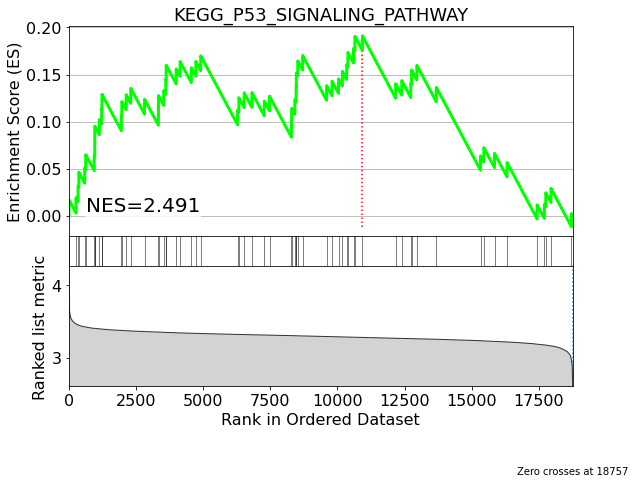

In [824]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "KEGG_P53_SIGNALING_PATHWAY", 
                             c2_kegg_gmt, 
                             result_kegg, compact=False)
fig.savefig("plots/CRISPRi-rho-gsea-KEGG_P53_SIGNALING_PATHWAY.pdf", bbox_inches='tight')

### KEGG_ACUTE_MYELOID_LEUKEMIA

In [719]:
result_kegg.loc['KEGG_ACUTE_MYELOID_LEUKEMIA',:].leading_edge

'PIK3R1,MAP2K2,PIK3R5,PIK3CD,MAP2K1,SOS1,RUNX1T1,PIM2,PIK3R2,RAF1,PIK3CG,BRAF,NFKB1,NRAS,MAPK1,MAPK3,LEF1,CCND1,STAT3,TCF7L2,RPS6KB1,AKT1,PIK3CB,CEBPA,TCF7L1,RUNX1,KIT'

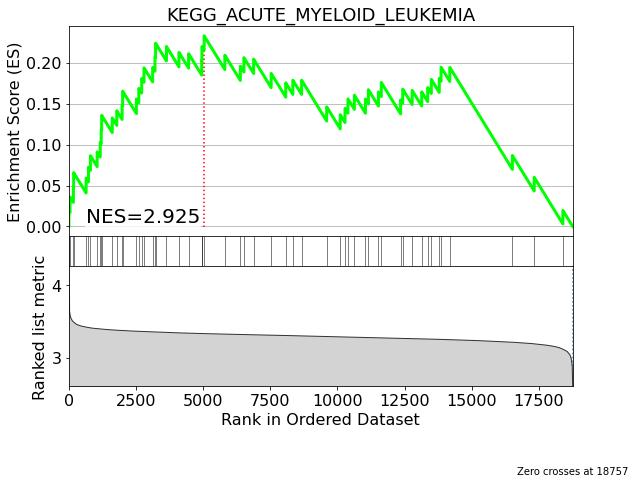

In [825]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "KEGG_ACUTE_MYELOID_LEUKEMIA", 
                             c2_kegg_gmt, 
                             result_kegg, compact=False)
fig.savefig("plots/CRISPRi-rho-gsea-KEGG_ACUTE_MYELOID_LEUKEMIA.pdf", bbox_inches='tight')

### GOBP_RNA_MODIFICATION

In [826]:
result_go.loc['GOBP_RNA_MODIFICATION',:].leading_edge

'ANKRD16,FTSJ3,ALKBH1,KTI12,TRIT1,RPUSD4,METTL4,TRMT10C,ELP3,METTL14,TRMT12,TRUB2,URM1,NSUN6,SSB,ELP6,TRMT10A,DUS2,RBM15,TPRKB,GTPBP3,PUS7,ZC3H13,NAF1,PARN,ELP2,CBLL1,TRMT2B,TARBP1,PUSL1,DUS1L,METTL1,METTL8,CTU2,NUDT16,FTO,METTL3,GAR1,PUS7L,MEPCE,MTO1,MOCS3,RPUSD3,TRUB1,RPUSD2,AICDA,RNMT,DKC1,DIMT1,ZCCHC4,ELP5,WDR4,TRMT11,NSUN4,METTL5,BCDIN3D,CTU1,AARS2,ELP4,THADA,ALKBH8'

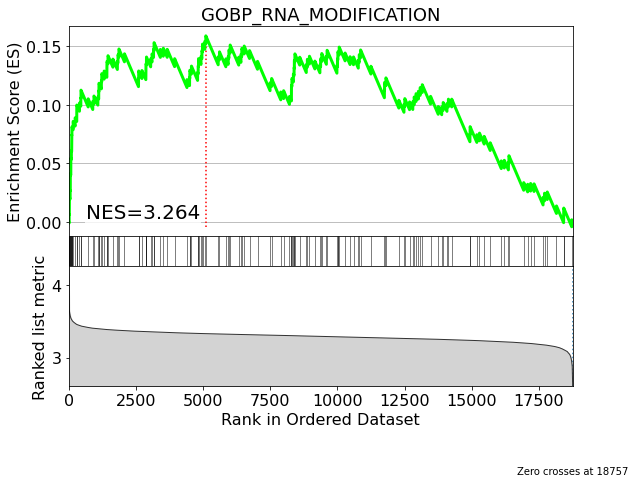

In [827]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "GOBP_RNA_MODIFICATION", 
                             c5_go_gmt, 
                             result_go, compact=False)
fig.savefig("plots/CRISPRi-rho-gsea-GOBP_RNA_MODIFICATION.pdf", bbox_inches='tight')

### GOCC_SPLICEOSOMAL_COMPLEX

In [828]:
result_go.loc['GOCC_SPLICEOSOMAL_COMPLEX',:].leading_edge

'RBM3,PNN,SNRPF,CTNNBL1,RBMXL2,CWF19L1,ZRSR2,SNW1,HNRNPU,PRPF8,SNRNP40,HNRNPF,WBP4,ZCRB1,HNRNPH3,SYF2,SREK1,ZNF830,HNRNPR,LSM2,PPIL3,PPIE,AAR2,SYNCRIP,SNRPC,SNRNP70,LSM5,AQR,SF3B5,PPIL1,HNRNPK,BUD13,LUC7L3,WBP11,PHF5A'

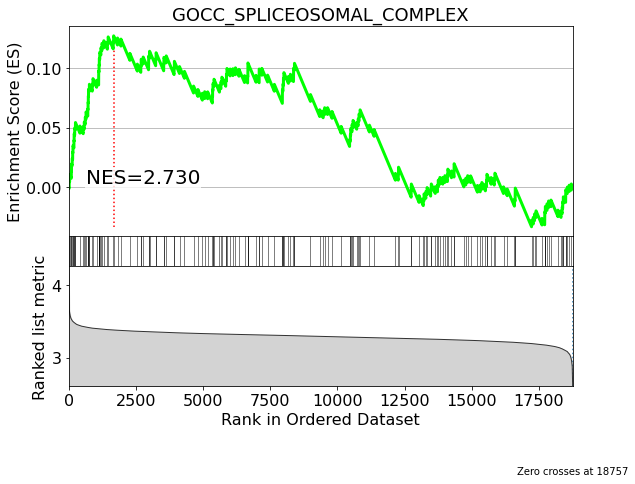

In [829]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "GOCC_SPLICEOSOMAL_COMPLEX", 
                             c5_go_gmt, 
                             result_go, compact=False)
# fig.savefig("plots/gesa_running_sum_GOBP_RNA_MODIFICATION.pdf", bbox_inches='tight')

### GOBP_RNA_SPLICING

In [830]:
result_go.loc['GOBP_RNA_SPLICING',:].leading_edge

'PPIG,CWF19L1,ZRSR2,METTL14,HNRNPU,FAM172A,ZCRB1,POLR2L,RBM15,ZC3H13,SRSF10,ZNF830,PRMT7,METTL3,ACIN1,SYNCRIP,SNRPC,LSM5,GEMIN4,SF3B5,PPIL1,SNUPN,RBFOX2,HNRNPK,CELF3,LUC7L3,PPARGC1A,WBP11,GPATCH1,ESRP1,TSEN34,SRSF11,GEMIN8,PNN,SNRPF,CTNNBL1,POLR2A,SRPK3,TRA2B,SNRPB,ZNF326,RTCB,SNW1,PCBP2,DHX9,RAVER1,SNRNP40,IVNS1ABP,DAZAP1,PTBP1,HNRNPH3,SAP18,CSTF2,SREK1,HNRNPR,LSM2,THRAP3,PPIL3,SNIP1,PPIE,AAR2,DDX20,CSTF3,SNRNP70,AQR,SNRPA,POLR2D,RBM10,DDX1,PHF5A,RBM3,PRCC,PTBP3,PUF60,SCAF11,PRPF8,RBM19,CPSF7,REST,RBM4B,CPSF4,BUD13,CPSF3,RBMXL2,SLC38A2,KHDRBS2,METTL4,ZMAT5,DYRK1A,SF1,SF3B4,HNRNPF,WBP4,CPSF1,PPP1R9B,CHERP,PAPOLA,SYMPK,CELF4,SYF2,ZRANB2,RNPC3,SPEN,PRX,HNRNPH2,SRSF6,GEMIN5,PSIP1,RAVER2,ZC3H10,SRRT,SRPK1,WDR83,KHDRBS3'

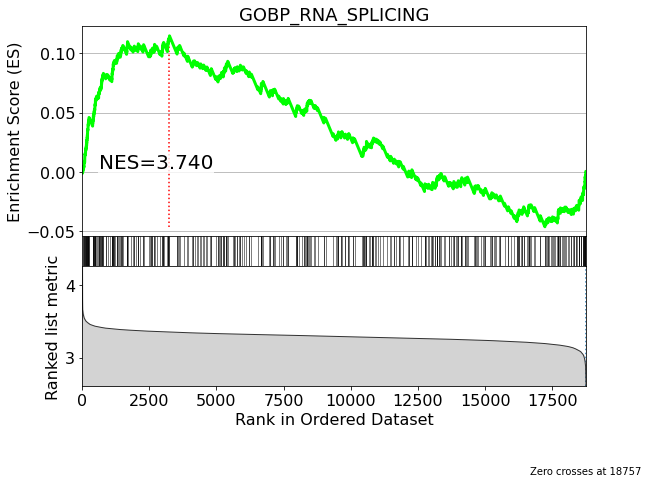

In [831]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "GOBP_RNA_SPLICING", 
                             c5_go_gmt, 
                             result_go, compact=False)
fig.savefig("plots/CRISPRi-rho-gsea-GOBP_RNA_SPLICING.pdf", bbox_inches='tight')

### GOCC_MRNA_EDITING_COMPLEX 

In [832]:
result_go.loc['GOBP_MRNA_MODIFICATION',:].leading_edge

'PCIF1,METTL8,A1CF,PUS3,APOBEC1,TRMT61A,PUS1,METTL3,TRMT61B,PUS7,ZC3H13,TRUB1,TRMT10C,BAG4,METTL14,CBLL1,DKC1,APOBEC2'

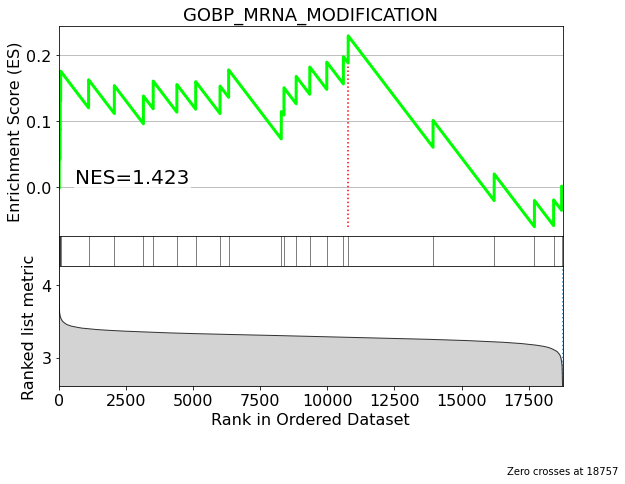

In [833]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "GOBP_MRNA_MODIFICATION", 
                             c5_go_gmt, 
                             result_go, compact=False)
fig.savefig("plots/CRISPRi-rho-gsea-GOBP_MRNA_MODIFICATION.pdf", bbox_inches='tight')

### GOCC_MRNA_EDITING_COMPLEX 

In [834]:
result_go.loc['GOCC_MRNA_EDITING_COMPLEX',:].leading_edge

'METTL14,CBLL1,ZC3H13,METTL3'

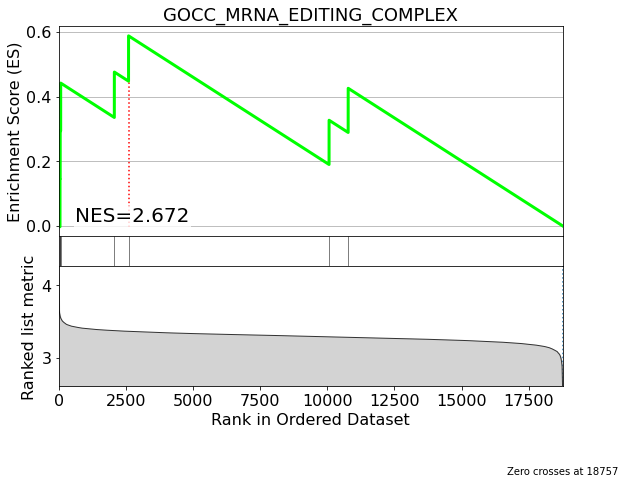

In [835]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "GOCC_MRNA_EDITING_COMPLEX", 
                             c5_go_gmt, 
                             result_go, compact=False)
fig.savefig("plots/CRISPRi-rho-gsea-GOCC_MRNA_EDITING_COMPLEX.pdf", bbox_inches='tight')

### METTL3 related

In [ ]:
r = result_go[(result_go.nes.abs()>2) & 
              # (result_go.geneset_size < 30) & 
              (result_go.leading_edge.str.contains('ZC3H13')) &
              (result_go.leading_edge.str.contains('METTL3')) 
              # (result_go.leading_edge.str.contains('YTHDF2'))
].copy()

fig_table = blitz.plot.top_table(
    signature, c5_go_gmt, r,
    n=11
)

## Sensitivity hits

### BCL2 related

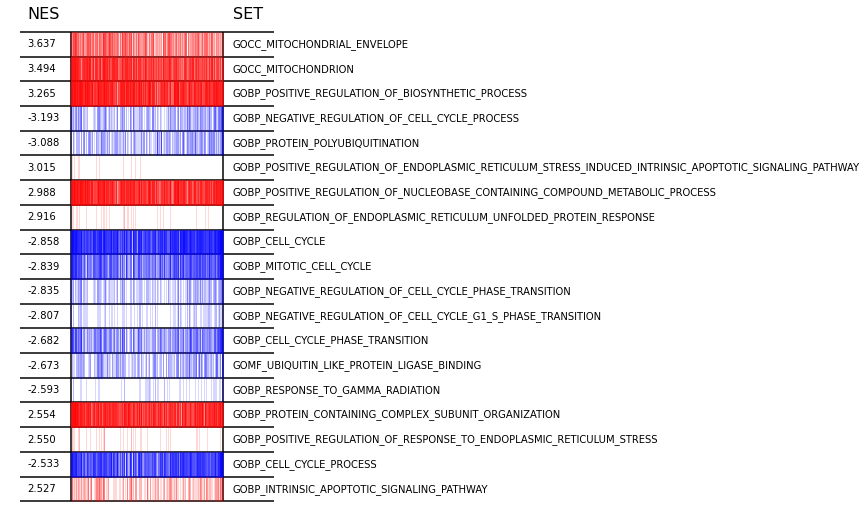

In [836]:
r = result_go[(result_go.nes.abs()>2.5) & 
              # (result_go.geneset_size < 100) & 
              (result_go.leading_edge.str.contains('BCL2'))
].copy()

fig_table = blitz.plot.top_table(
    signature, c5_go_gmt, r,
    n=r.shape[0]
)

### GOBP_NEGATIVE_REGULATION_OF_INTRINSIC_APOPTOTIC_SIGNALING_PATHWAY_BY_P53_CLASS_MEDIATOR

In [724]:
result_go.loc['GOBP_NEGATIVE_REGULATION_OF_INTRINSIC_APOPTOTIC_SIGNALING_PATHWAY_BY_P53_CLASS_MEDIATOR',:].leading_edge

'CD74,MUC1,KDM1A,CD44,BCL2,ARMC10,PTTG1IP,TRIAP1'

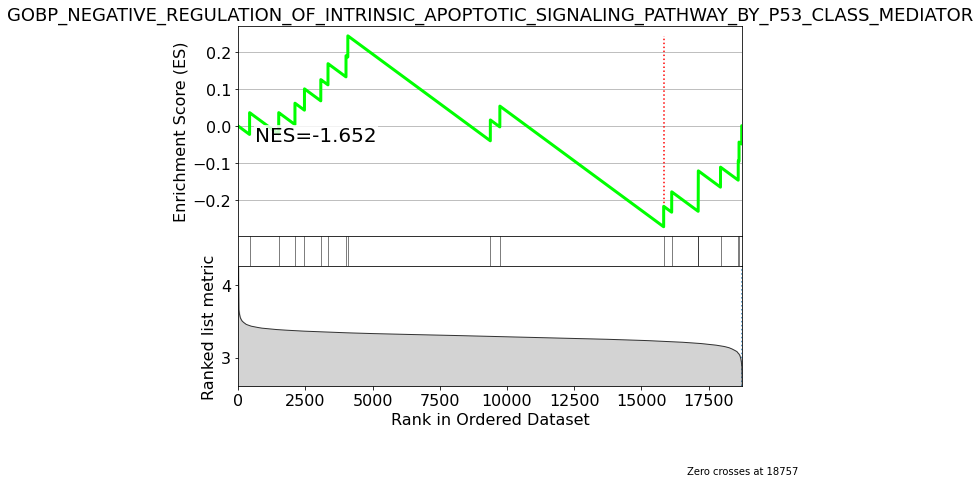

In [837]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(
    signature, 
    "GOBP_NEGATIVE_REGULATION_OF_INTRINSIC_APOPTOTIC_SIGNALING_PATHWAY_BY_P53_CLASS_MEDIATOR", 
    c5_go_gmt, 
    result_go, compact=False)

fig.savefig("plots/CRISPRi-rho-gsea-GOBP_NEGATIVE_REGULATION_OF_INTRINSIC_APOPTOTIC_SIGNALING_PATHWAY_BY_P53_CLASS_MEDIATOR.pdf", bbox_inches='tight')

### GOBP_REGULATION_OF_ENDOPLASMIC_RETICULUM_UNFOLDED_PROTEIN_RESPONSE

In [838]:
result_go.loc['GOBP_REGULATION_OF_ENDOPLASMIC_RETICULUM_UNFOLDED_PROTEIN_RESPONSE',:].leading_edge

'FICD,NCK1,ERN1,XBP1,DDRGK1,PTPN2,PIK3R1,ATF6,BAK1,HSPA5,ATF6B,BAX,PPP1R15A,COPS5,ABCA7,BOK,PTPN1,BCL2L11,DNAJB9'

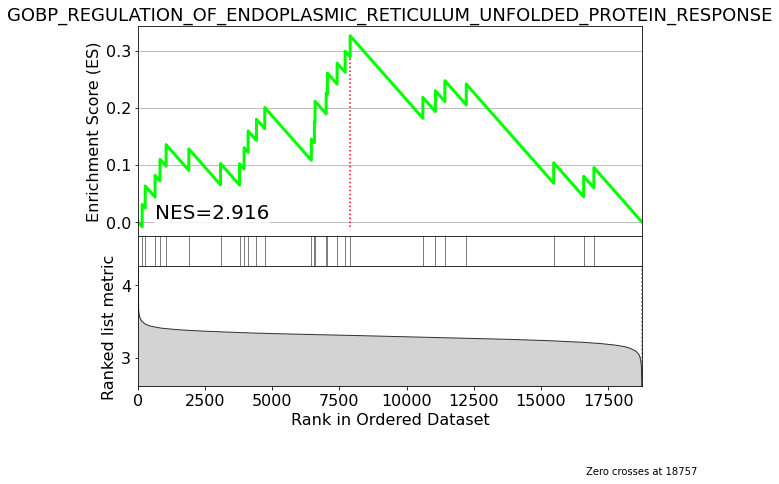

In [839]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(
    signature, 
    "GOBP_REGULATION_OF_ENDOPLASMIC_RETICULUM_UNFOLDED_PROTEIN_RESPONSE", 
    c5_go_gmt, result_go, compact=False
)

fig.savefig("plots/CRISPRi-rho-gsea-GOBP_REGULATION_OF_ENDOPLASMIC_RETICULUM_UNFOLDED_PROTEIN_RESPONSE.pdf", bbox_inches='tight')

### DCP2, DCPS, and RNA decapping related

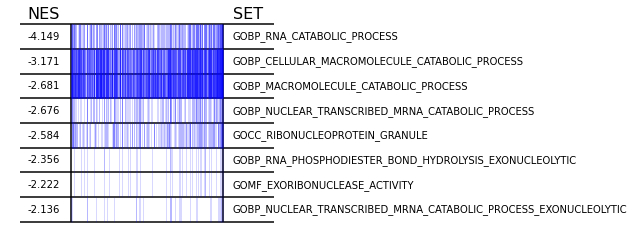

In [762]:
r = result_go[(result_go.nes.abs()>2) & 
              # (result_go.geneset_size < 100) & 
              (result_go.leading_edge.str.contains('DCPS')) &
              (result_go.leading_edge.str.contains('DCP2'))
].copy()

fig_table = blitz.plot.top_table(
    signature, c5_go_gmt, r,
    n=8
)

### KEGG_RNA_DEGRADATION

In [841]:
result_kegg.loc['KEGG_RNA_DEGRADATION',:].leading_edge

'EDC3,CNOT6L,CNOT4,PATL1,EXOSC6,DCPS,ENO2,CNOT8,LSM7,LSM3,CNOT3,MPHOSPH6,DDX6,CNOT2,CNOT6,EXOSC9,CNOT7,TTC37,CNOT10,EXOSC10,C1D,ENO1,EXOSC1,DCP1A,SKIV2L,EXOSC4,EXOSC3,WDR61,DCP2,CNOT1,DIS3'

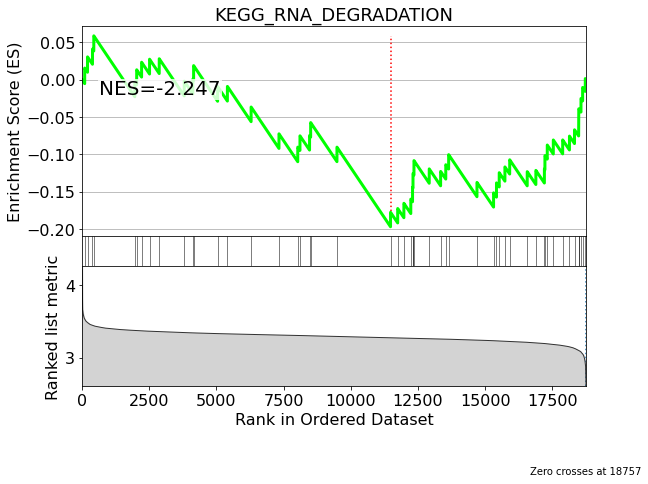

In [840]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "KEGG_RNA_DEGRADATION", 
                             c2_kegg_gmt, 
                             result_kegg, compact=False)

fig.savefig("plots/CRISPRi-rho-gsea-KEGG_RNA_DEGRADATION.pdf", bbox_inches='tight')

### GOBP_DEADENYLATION_DEPENDENT_DECAPPING_OF_NUCLEAR_TRANSCRIBED_MRNA

In [842]:
result_go.loc['GOBP_DEADENYLATION_DEPENDENT_DECAPPING_OF_NUCLEAR_TRANSCRIBED_MRNA',:].leading_edge

'PATL1,DCPS,EIF4ENIF1,CNOT7,DCP2,DCP1A,PATL2'

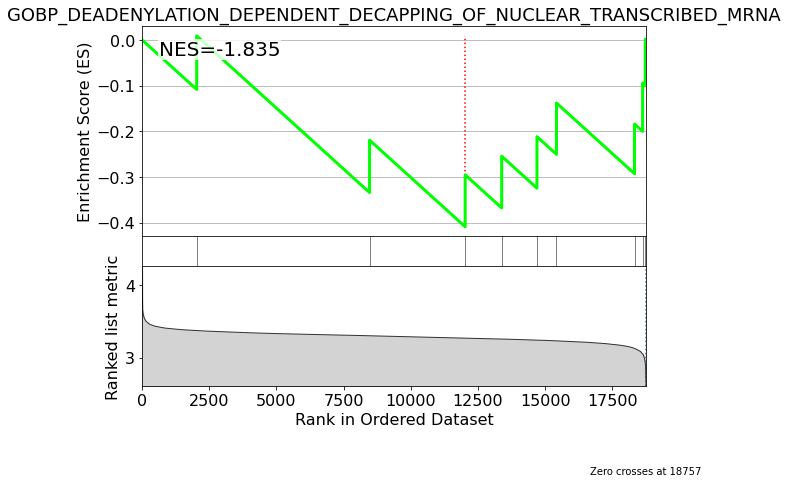

In [843]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(
    signature, 
    "GOBP_DEADENYLATION_DEPENDENT_DECAPPING_OF_NUCLEAR_TRANSCRIBED_MRNA", 
    c5_go_gmt, result_go, compact=False
)

fig.savefig("plots/CRISPRi-rho-gsea-GOBP_DEADENYLATION_DEPENDENT_DECAPPING_OF_NUCLEAR_TRANSCRIBED_MRNA.pdf", bbox_inches='tight')

### MCL1 related 

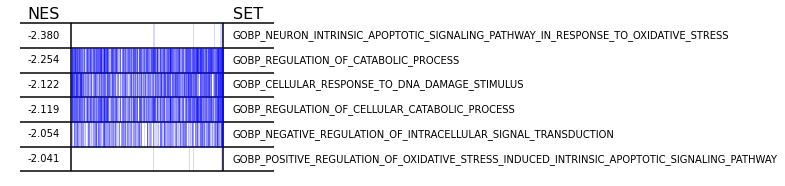

In [875]:
r = result_go[
    (result_go.nes.abs() > 2) &
    (result_go.leading_edge.str.contains('MCL1'))
]

fig_table = blitz.plot.top_table(
    signature, c5_go_gmt, r,
    n=r.shape[0]
)

### INTS5 related 

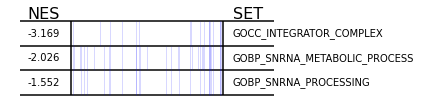

In [844]:
fig_table = blitz.plot.top_table(
    signature, c5_go_gmt, 
    result_go[result_go.leading_edge.str.contains('INTS5')],
    n=3
)

### GOCC_INTEGRATOR_COMPLEX

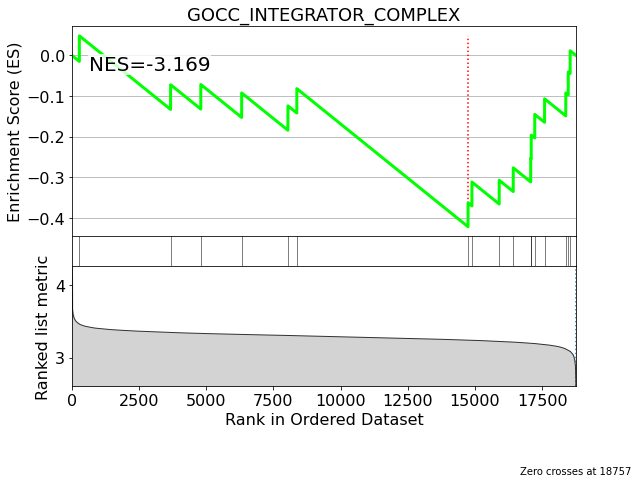

In [845]:
# plot the enrichment results and save to pdf
fig = blitz.plot.running_sum(signature, "GOCC_INTEGRATOR_COMPLEX", 
                             c5_go_gmt, 
                             result_go, compact=False)
fig.savefig("plots/CRISPRi-rho-gsea-GOCC_INTEGRATOR_COMPLEX.pdf", bbox_inches='tight')

# 

In [846]:
!date

Sat Sep 17 19:20:21 PDT 2022
